**Общая информация**

**Срок сдачи:** 13 марта 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 13 марта, -4 балла после 06:00 20 марта, -6 баллов после 06:00 27 марта

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе.

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn 4 балла для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 3 (2 балла)
Выполнить требования pep8

###### Задание 5 (2 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)


In [3]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%load_ext pycodestyle_magic

In [55]:
%%pycodestyle
def __init__(self, n_neighbors):
    self.n_neighbours = n_neighbors

def fit(self, X, y):
    self.X = np.float64(X)
    self.classes, self.y = np.unique(y, return_inverse=True)

def distance(self, vec):
    return np.sqrt((((self.X - vec)) ** 2).sum(axis=1))

def predict_proba(self, X):
    dist = np.apply_along_axis(self.distance, 1, np.float64(X)).T
    ind = np.argsort(dist, axis=0)[:self.n_neighbours, :]
    classes_here = self.classes[self.y[ind]]
    counts = np.sum(classes_here.T.reshape((classes_here.shape[1], 1, classes_here.shape[0]))== self.classes.reshape((1, self.classes.shape[0], 1)), axis=2)
    return counts / self.n_neighbours

def predict(self, X):
    proba = self.predict_proba(X)
    y_pred = self.classes[np.argsort(proba, axis=1)[:, -1:]]
    return y_pred.ravel()

def score(self, X, y):
    y_pred = self.predict(X)
    diff = np.count_nonzero(y - y_pred)
    return 1 - diff / y.shape[0]


**IRIS**

In [35]:
iris = datasets.load_iris()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)


In [48]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)





In [24]:
%time clf.fit(X_train, y_train)

CPU times: user 1.37 ms, sys: 183 µs, total: 1.55 ms
Wall time: 4.52 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [25]:
%time my_clf.fit(X_train, y_train)


CPU times: user 504 µs, sys: 0 ns, total: 504 µs
Wall time: 2.87 ms


In [26]:
%time clf.predict(X_test)



CPU times: user 1.25 ms, sys: 0 ns, total: 1.25 ms
Wall time: 1.27 ms


array([0, 0, 2, 1, 1, 1, 2, 2, 0, 1, 0, 2, 0, 2, 1])

In [56]:
%time my_clf.predict(X_test)






CPU times: user 2.22 ms, sys: 5 µs, total: 2.22 ms
Wall time: 6.69 ms


array([0, 2, 1, 0, 0, 0, 1, 0, 1, 2, 2, 1, 2, 1, 2])

In [28]:
%time clf.predict_proba(X_test)

CPU times: user 957 µs, sys: 126 µs, total: 1.08 ms
Wall time: 1.08 ms


array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [57]:
%time my_clf.predict_proba(X_test)

CPU times: user 1.52 ms, sys: 0 ns, total: 1.52 ms
Wall time: 1.47 ms


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [30]:
clf.score(X_test, y_test)

1.0

In [58]:
my_clf.score(X_test, y_test)


1.0

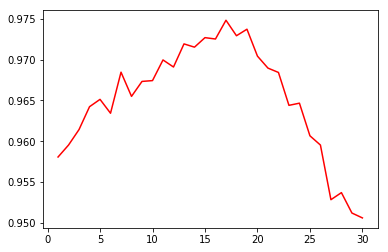

In [60]:
# Задание 3

num_n = 30
num_av = 2000
scm = np.zeros(num_n)
sc = np.zeros(num_av)
for n in range(1, num_n + 1):
    for i in range(num_av):
        X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=n)
        my_clf.fit(X_train, y_train)
        sc[i] = my_clf.score(X_test, y_test)
    scm[n - 1] = sc.mean()
plt.plot(range(1, num_n + 1), scm, 'red')
plt.show()
#оптимальный n_neighbors=17


**MNIST**

In [62]:
mnist = fetch_mldata('MNIST original')

In [63]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, stratify=mnist.target)

In [64]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [65]:
%time clf.fit(X_train, y_train)

CPU times: user 27.5 s, sys: 148 ms, total: 27.6 s
Wall time: 27.6 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [ ]:
%time my_clf.fit(X_train, y_train)

CPU times: user 45.5 ms, sys: 92 ms, total: 138 ms
Wall time: 137 ms


In [ ]:
%time clf.predict(X_test)

In [ ]:
%time my_clf.predict(X_test)

In [ ]:
%time clf.predict_proba(X_test)

In [ ]:
%time my_clf.predict_proba(X_test)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
my_clf.score(X_test, y_test)

Задание 5

In [ ]:
# seaborn - разные варианты оформления графиков, 
#также в библиотеке есть достаточно сложные типы визуализации, 
#которые в matplotlib потребовали бы большого количество кода.
# matplotlib - удобно для простых визуализаций 
# train_test_split - разбивание рандомно нашей выборки на две - для тренировки и тестов в заданном соотношении
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - можно объединить несколько действий 
#(которые часто встречаются вместе или отдельно не используются) в одно
# StandardScaler (from sklearn.preprocessing import StandardScaler) - нормировка так, чтобы 
#среднее стало равно 0, а стандартное отклонение 1
# ClassifierMixin - базовый класс для классификаторов (содержит методы __init__ и score)
# NeighborsBase - базовый класс для knn
# KNeighborsMixin - аналогично + метод поиска ближайших соседей
# SupervisedIntegerMixin - базовый класс (содержит fit)